In [1]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import os
import pathlib

In [46]:
p = "/home/aarav/gpudrive/nocturne_data/formatted_json_v2_no_tl_valid/tfrecord-00005-of-00150_192.json"
# p = pathlib.Path(p)
# json_files = [pos_json for pos_json in os.listdir(p) if pos_json.endswith('.json')]
with open(p) as f:
    data = json.load(f)

In [47]:
# road_types = set()
# object_types = set()
# max_roads = 0
# max_objects = 0
# max_positions = 0
# max_roadpoints = 0
# for jsonfile in json_files:
#     with open(p / jsonfile) as f:
#         data = json.load(f)
#     try:
#         roads = data["roads"]
#         objects = data["objects"]
#         df_roads = pd.DataFrame(roads)
#         df_objects = pd.DataFrame(objects)
#         road_types.update(df_roads["type"].unique())
#         object_types.update(df_objects["type"].unique())
#         max_roads = max(max_roads, len(roads))
#         max_objects = max(max_objects, len(objects))
#         for obj in df_objects.iterrows():
#             max_positions = max(max_positions, len(obj[1]["position"]))
#         for road in df_roads.iterrows():
#             max_roadpoints = max(max_roadpoints, len(road[1]["geometry"]))
#     except:
#         print(jsonfile)


In [48]:
print("Road types: ", road_types)
print("Object types: ", object_types)
print("Max roads: ", max_roads)
print("Max objects: ", max_objects)
print("Max positions: ", max_positions)
print("Max roadpoints: ", max_roadpoints)

NameError: name 'road_types' is not defined

In [49]:
roads = data["roads"]
objects = data["objects"]
df = pd.DataFrame(roads)
df_objects = pd.DataFrame(objects)
df = df[(df['type']=='road_edge') | (df['type']=='road_line') | (df['type']=='lane')]

In [50]:
len(df)

241

In [51]:
df['geometry'].apply(len).sum()

17163

In [52]:
df.iloc[8]['geometry']

[{'x': 1895.3066180508206, 'y': -2688.675850494845},
 {'x': 1895.730858606577, 'y': -2688.939100740832},
 {'x': 1896.155089799079, 'y': -2689.2023660765876},
 {'x': 1896.579311659789, 'y': -2689.4656464469094},
 {'x': 1897.0035242214283, 'y': -2689.7289418005385},
 {'x': 1897.427727515459, 'y': -2689.992252083851},
 {'x': 1897.851921575861, 'y': -2690.2555772440105},
 {'x': 1898.27610643158, 'y': -2690.5189172281816},
 {'x': 1898.700282117854, 'y': -2690.782271983528},
 {'x': 1899.1244486661449, 'y': -2691.0456414564255},
 {'x': 1899.5486061066574, 'y': -2691.309025594827},
 {'x': 1899.972754473371, 'y': -2691.5724243451073},
 {'x': 1900.3968937977481, 'y': -2691.835837654431},
 {'x': 1900.8210241137683, 'y': -2692.0992654699626},
 {'x': 1901.245145450377, 'y': -2692.3627077388655},
 {'x': 1901.6692578428126, 'y': -2692.6261644083042},
 {'x': 1902.093361321279, 'y': -2692.889635425443},
 {'x': 1902.517455918497, 'y': -2693.1531207374455},
 {'x': 1902.941541667188, 'y': -2693.4166202906

In [53]:
# Flatten the lists
flattened_data = []
for i, row in df.iterrows():
    d = []
    for point in row['geometry']:
        d.append({'x': point['x'], 'y': point['y'], 'type': row['type']})
    flattened_data.append(pd.DataFrame(d))
# flattened_df = pd.DataFrame(flattened_data)

In [54]:

def plot_road_edge(flattened_data, ctr = 100000, title=""):
    plt.figure(figsize=(5, 3), dpi=100)
    i = 0
    for flattened_df in flattened_data:
        plt.plot(flattened_df['x'], flattened_df['y'], '-', color='blue' ,linewidth=0.5)
        i += 1
        if(i >= ctr):
            break
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(title)
    # plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

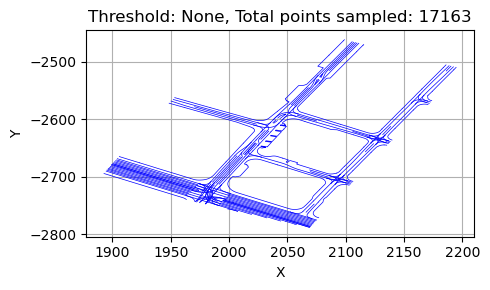

<BarContainer object of 1 artists>

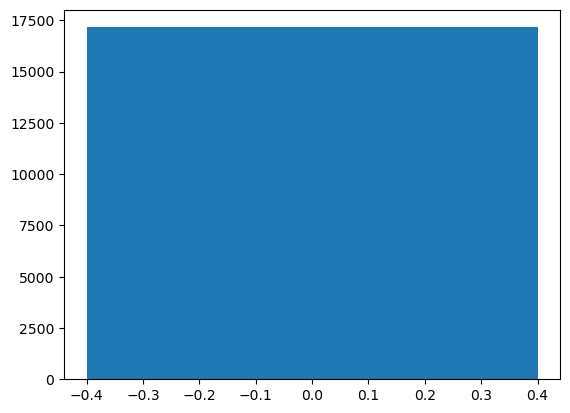

In [55]:
num_points = {}

sum = 0
for df_ in flattened_data:
    sum += len(df_)
num_points[0] = sum
plot_road_edge(flattened_data, title="Threshold: None, Total points sampled: {}".format(sum))

plt.bar(num_points.keys(), num_points.values())

In [56]:
# # Flatten the lists
# flattened_data = []
# for i, row in df.iterrows():
#     d = []
#     start = 0
#     end = -1
#     num_points = len(row['geometry'])
#     j = 0
#     while True:
#         x1,y1 = row['geometry'][j]['x'], row['geometry'][j]['y']
#         x2, y2 = row['geometry'][j+1]['x'], row['geometry'][j+1]['y']
#         x3, y3 = row['geometry'][j+2]['x'], row['geometry'][j+2]['y']
#         shoelace_area = abs((x1-x3)*(y2-y1)-(x1-x2)*(y3-y1))
#         if shoelace_area < 1e-7:
#             end = j+2
#             j += 1
#         else:
#             if(end != -1):
#                 d.append({'x': row['geometry'][start]['x'], 'y': row['geometry'][start]['y']})
#                 d.append({'x': row['geometry'][end]['x'], 'y': row['geometry'][end]['y']})
#                 end = -1
#             d.append({'x': row['geometry'][j]['x'], 'y': row['geometry'][j]['y']})
#             d.append({'x': row['geometry'][j+1]['x'], 'y': row['geometry'][j+1]['y']})
#             j += 1
#         if j >= num_points - 2:
#             break
#     if(end != -1):
#         d.append({'x': row['geometry'][start]['x'], 'y': row['geometry'][start]['y']})
#         d.append({'x': row['geometry'][end]['x'], 'y': row['geometry'][end]['y']})
#     flattened_data.append(pd.DataFrame(d))
# # flattened_df = pd.DataFrame(flattened_data)

In [57]:
def return_flattened_data(threshold = 0.0):
    flattened_data = []

    for _, row in df.iterrows():
        num_points = len(row['geometry'])
        
        if num_points < 3:  # Handle rows with fewer than 3 points
            flattened_data.append(pd.DataFrame(row['geometry']))
            continue
        
        d = []  # Temporary list to store the flattened points for current row
        start = 0  # Starting index of collinear sequence
        j = 0  # Current index in point list
        
        while j < num_points - 2:
            x1, y1 = row['geometry'][j]['x'], row['geometry'][j]['y']
            x2, y2 = row['geometry'][j + 1]['x'], row['geometry'][j + 1]['y']
            x3, y3 = row['geometry'][j + 2]['x'], row['geometry'][j + 2]['y']
            
            # Calculate the shoelace area for the triplet
            shoelace_area = 0.5 * abs((x1 - x3) * (y2 - y1) - (x1 - x2) * (y3 - y1))
            
            # If the points are collinear
            if shoelace_area < threshold:
                j += 1
            else:
                if j != start:  # If there was a collinear sequence before
                    d.append({'x': row['geometry'][start]['x'], 'y': row['geometry'][start]['y']})
                    d.append({'x': row['geometry'][j]['x'], 'y': row['geometry'][j]['y']})
                    start = j + 1  # Update the start index
                    j += 1  # Skip to the next point pair
                else:  # No collinear sequence, add the individual points
                    d.append({'x': x1, 'y': y1})
                    d.append({'x': x2, 'y': y2})
                    start = j + 2  # Update the start index
                    j += 2  # Skip to the next point pair
        
        # Handle the last two points if they are part of a collinear sequence
        if j == num_points - 2 and start != j:
            d.append({'x': row['geometry'][start]['x'], 'y': row['geometry'][start]['y']})
            d.append({'x': row['geometry'][j]['x'], 'y': row['geometry'][j]['y']})
        elif j == num_points - 2:
            d.append({'x': row['geometry'][j]['x'], 'y': row['geometry'][j]['y']})
            d.append({'x': row['geometry'][j + 1]['x'], 'y': row['geometry'][j + 1]['y']})
        
        flattened_data.append(pd.DataFrame(d))
    return flattened_data

0.1


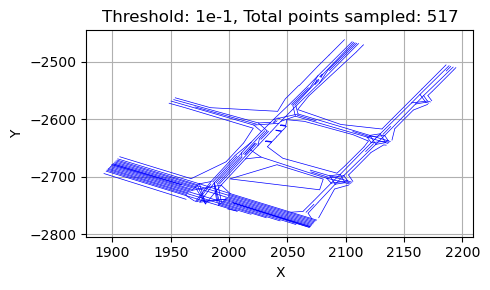

0.01


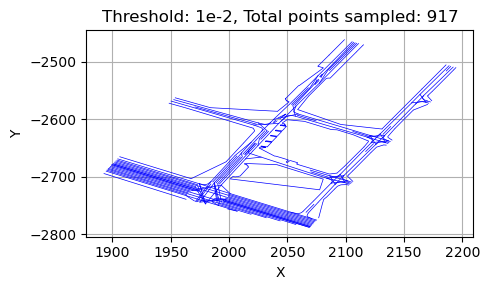

0.001


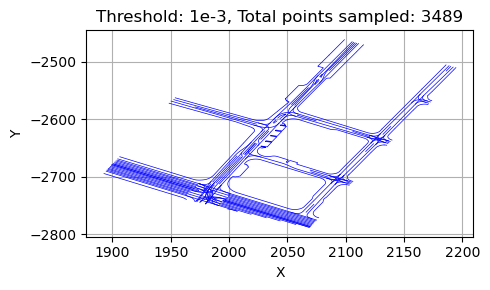

0.0001


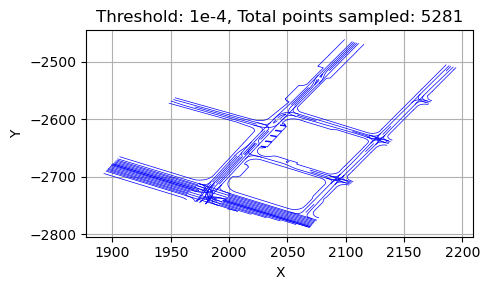

1e-05


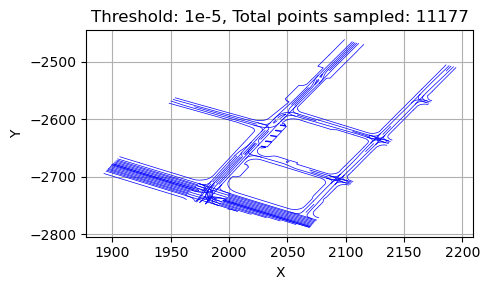

1e-06


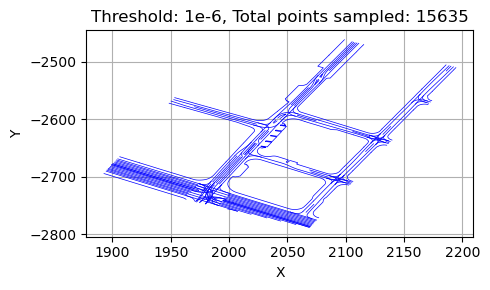

1e-07


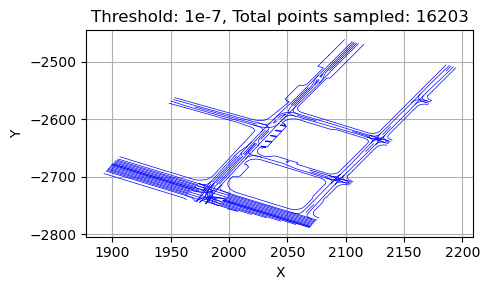

1e-08


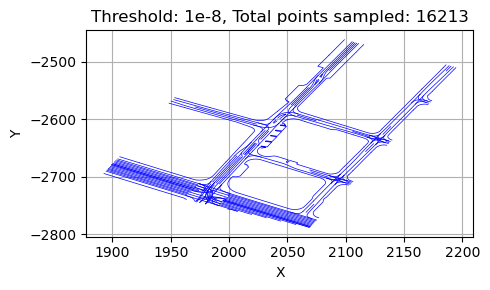

<BarContainer object of 8 artists>

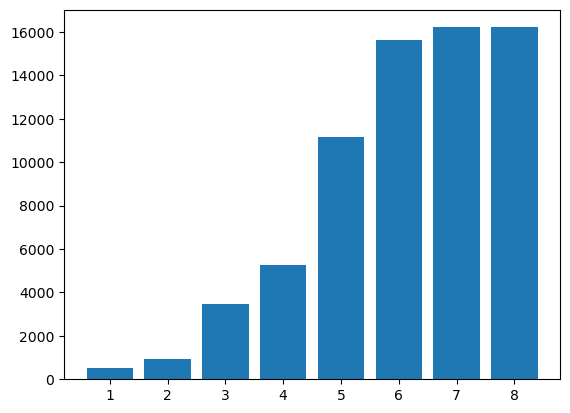

In [58]:
num_points = {}
for thresh in range(1,9):
    print(1/(10**thresh))
    flattened_data = return_flattened_data(threshold = 1/(10**thresh))
    sum = 0
    for df_ in flattened_data:
        sum += len(df_)
    num_points[thresh] = sum
    plot_road_edge(flattened_data, title="Threshold: 1e-{}, Total points sampled: {}".format(thresh, sum))

plt.bar(num_points.keys(), num_points.values())

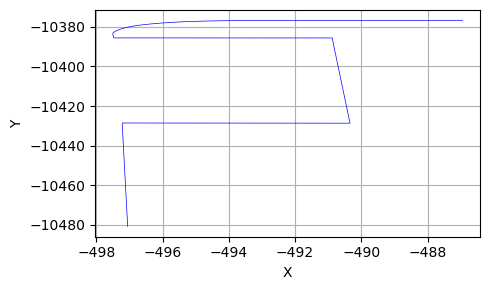

In [28]:
flattened_data = return_flattened_data(threshold = 0.001)
plot_road_edge(flattened_data[8:9])

In [29]:
flattened_data[8:9][0]

,x,y
0,-497.056758,-10480.727878
1,-497.221382,-10429.031906
2,-497.215068,-10428.533626
3,-490.833459,-10428.616016
4,-490.342566,-10428.622354
5,-490.875844,-10386.107195
6,-490.873369,-10385.611450
7,-497.004210,-10385.580554
8,-497.475813,-10385.578177
9,-497.496766,-10384.263893


In [30]:
def distance(x1, y1, x2, y2):
    return ((x1-x2)**2 + (y1-y2)**2)**0.5

for i in range(len(flattened_data[8])):
    if i == 0:
        continue
    d = distance(flattened_data[8].iloc[i-1]['x'], flattened_data[8].iloc[i-1]['y'], flattened_data[8].iloc[i]['x'], flattened_data[8].iloc[i]['y'])
    print(d)

51.69623405788307
0.49832091567797515
6.382140962585191
0.49093392070543507
42.51850298437612
0.49575123548960426
6.130919142639499
0.47160916502075995
1.3144506798455646
0.4381502266210067
0.3862151918580253
0.38619220618589145
0.38619728260808484
0.3862161520855131
0.45225163267557467
0.4522443473288066
0.4522336978485129
0.4522196765227068
0.452202273924107
0.4521814785278324
0.4521572783816245
0.45212966199360777
0.45209862370643866
0.452064158927437
0.4641679904269003
0.46406435204439134
0.46398737735098367
0.46397686751329603
0.46406109226568765
0.4642309194230017
0.4644053061752463
0.4763564784912524
5.716257807531108


In [ ]:
Distance: 51.6956
Distance: 0.499063
Distance: 6.38213
Distance: 0.490941
Distance: 42.518
Distance: 0.4961
Distance: 6.13091
Distance: 0.471592
Distance: 1.31462
Distance: 0.437556
Distance: 0.386731
Distance: 0.385887
Distance: 0.386717
Distance: 0.385828
Distance: 0.452397
Distance: 0.452608
Distance: 0.451755
Distance: 0.452157
Distance: 0.452336
Distance: 0.451962
Distance: 0.452576
Distance: 0.452185
Distance: 0.451538
Distance: 0.452223
Distance: 0.464459
Distance: 0.463742
Distance: 0.464291
Distance: 0.463799
Distance: 0.463973
Distance: 0.464299
Distance: 0.464421
Distance: 0.47634
Distance: 6.19262

In [ ]:
-497.057 -10480.7
-497.221 -10429
-497.215 -10428.5
-490.833 -10428.6
-490.343 -10428.6
-490.876 -10386.1
-490.873 -10385.6
-497.004 -10385.6
-497.476 -10385.6
-497.497 -10384.3
-497.504 -10383.8
-497.507 -10383.4
-497.496 -10383.1
-497.469 -10382.7
-497.429 -10382.3
-497.376 -10381.8
-497.313 -10381.4
-497.237 -10380.9
-497.143 -10380.5
-497.029 -10380.1
-496.888 -10379.6
-496.72 -10379.2
-496.519 -10378.8
-496.284 -10378.4
-496.014 -10378.1
-495.697 -10377.7
-495.339 -10377.4
-494.942 -10377.2
-494.512 -10377
-494.061 -10376.9
-493.6 -10376.8
-493.136 -10376.8
-492.66 -10376.8
-486.945 -10376.7